# San Francisco Rental Prices Dashboard

In this notebook, you will compile the visualizations from the previous analysis into functions that can be used for a Panel dashboard.

In [1]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv


Bad key "text.kerning_factor" on line 4 in
/Users/fareedfreihat/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
# Read the Mapbox API key
load_dotenv()
mapbox_token = os.getenv("Mapbox_api_key")

# Import Data

In [3]:
# Import the CSVs to Pandas DataFrames
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")

file_path_2 = Path("Data/neighborhoods_coordinates.csv")
df_neighborhood_locations = pd.read_csv(file_path_2)

- - -

## Panel Visualizations

In this section, you will copy the code for each plot type from your analysis notebook and place it into separate functions that Panel can use to create panes for the dashboard. 

These functions will convert the plot object to a Panel pane.

Be sure to include any DataFrame transformation/manipulation code required along with the plotting code.

Return a Panel pane object from each function that can be used to build the dashboard.

Note: Remove any `.show()` lines from the code. We want to return the plots instead of showing them. The Panel dashboard will then display the plots.

In [4]:
# Define Panel Visualization Functions
def housing_units_per_year():
    """Housing Units Per Year."""
    
    # YOUR CODE HERE!
    avg_house_per_year = sfo_data['housing_units'].groupby(by='year', level=None).mean()
    
    fig_avg_house_per_year = plt.figure()
    
    avg_house_per_year_plot = avg_house_per_year.plot.bar(
        ylim=[370000, 387500],
        title='Housing Units in San Francisco from 2010 to 2016')
    avg_house_per_year_plot.set_xlabel("Year")
    avg_house_per_year_plot.set_ylabel("Housing Units")

    return fig_avg_house_per_year


def average_gross_rent():
    """Average Gross Rent in San Francisco Per Year."""
    
    # YOUR CODE HERE!
    avg_gross_rent_year = sfo_data['gross_rent'].groupby(by='year', level=None).mean()

    fig_avg_gross_avg_sale_sqft = plt.figure()

    avg_gross_rent_year_plot = avg_gross_rent_year.plot.line(
        ylim=[1000, 4500], 
        title='Average Gross Rent in San Francisco')
    avg_gross_rent_year_plot.set_xlabel("Year")
    avg_gross_rent_year_plot.set_ylabel("Gross Rent")
    
    
    return fig_avg_gross_avg_sale_sqft


def average_sales_price():
    """Average Sales Price Per Year."""
    
    # YOUR CODE HERE!
    avg_sale_price_year = sfo_data['sale_price_sqr_foot'].groupby(by='year', level=None).mean()
    
    fig_avg_sale_price_year = plt.figure()
    
    avg_sale_price_year_plot = avg_sale_price_year.plot.line(
        ylim=[300, 700], 
        title='Average Sales Per Year in San Francisco')
    avg_sale_price_year_plot.set_xlabel("Year")
    avg_sale_price_year_plot.set_ylabel("Avg Sale Price")
    
    return fig_avg_sale_price_year


def average_price_by_neighborhood():
    """Average Prices by Neighborhood."""
    
    # YOUR CODE HERE!
    avg_prices_df = sfo_data.groupby(by=['year','neighborhood'])
    avg_price_mean = avg_prices_df.mean()
    
    fig_avg_price_mean = plt.figure()
    
    avg_prices_df_plot = avg_price_mean.hvplot.line(
        x='year',
        y='sale_price_sqr_foot',
        xlabel= 'Year',
        ylabel= 'Price per Sq Ft',
        title='Average Price per Sq Ft',
        groupby='neighborhood',
        width=950
).opts(yformatter='%0f')
    
    return fig_avg_price_mean


def top_most_expensive_neighborhoods():
    """Top 10 Most Expensive Neighborhoods."""
    
    # YOUR CODE HERE!

    mean_sale_price_neighborhood = sfo_data.groupby(by='neighborhood').mean()
    mean_sale_price_neighborhood = mean_sale_price_neighborhood.sort_values(by='sale_price_sqr_foot', ascending=False).head(10)
    mean_sale_price_neighborhood = mean_sale_price_neighborhood.reset_index()
    
    
    top_10_neighborhoods_plot = mean_sale_price_neighborhood.hvplot.bar(
        x='neighborhood',
        y='sale_price_sqr_foot',
        rot=45,
        #ylim=[600,1000],
        title='Top 10 expensive neighborhoods')

    return top_10_neighborhoods_plot


def parallel_coordinates():
    """Parallel Coordinates Plot."""
    
    # YOUR CODE HERE!
    mean_sale_price_neighborhood = sfo_data.groupby(by='neighborhood').mean()
    
    mean_sale_price_neighborhood = mean_sale_price_neighborhood.sort_values(by='sale_price_sqr_foot', ascending=False).head(10)
    mean_sale_price_neighborhood = mean_sale_price_neighborhood.reset_index()
    
    parallel_coordinate_plot = px.parallel_coordinates(
        mean_sale_price_neighborhood,
        color='sale_price_sqr_foot')
    
    return parallel_coordinate_plot


def parallel_categories():
    """Parallel Categories Plot."""
    
    # YOUR CODE HERE!
    mean_sale_price_neighborhood = sfo_data.groupby(by='neighborhood').mean()
    mean_sale_price_neighborhood = mean_sale_price_neighborhood.sort_values(by='sale_price_sqr_foot', ascending=False).head(10)
    mean_sale_price_neighborhood = mean_sale_price_neighborhood.reset_index()
    
    
    parallel_categories_plot = px.parallel_categories(
        mean_sale_price_neighborhood,
        color='sale_price_sqr_foot',
        dimensions=['neighborhood', 'sale_price_sqr_foot', 'housing_units', 'gross_rent'],
        color_continuous_scale=px.colors.sequential.Inferno)
    
    return parallel_categories_plot


def neighborhood_map():
    """Neighborhood Map"""
    
    # YOUR CODE HERE!
    df_neighborhood_locations = pd.read_csv(file_path_2)
    all_neighborhoods = sfo_data.groupby(by='neighborhood').mean()
    all_neighborhoods.reset_index(inplace=True)
    all_neighborhoods.rename(columns={'neighborhood': 'Neighborhood'},inplace=True)
    all_neighborhoods = pd.merge(df_neighborhood_locations, all_neighborhoods, on='Neighborhood')

    px.set_mapbox_access_token(mapbox_token)
    map_scatter = px.scatter_mapbox(
        all_neighborhoods,
        lat='Lat',
        lon='Lon',
        size='sale_price_sqr_foot',
        color='gross_rent',
        color_continuous_scale=px.colors.cyclical.IceFire,
        size_max=15,
        zoom=10,
        hover_name='Neighborhood',
        title='Averange Sale Price Per Square Foot and Gross Rent in San Francisco')

    return map_scatter


## Panel Dashboard

In this section, you will combine all of the plots into a single dashboard view using Panel. Be creative with your dashboard design!

Tabs
    [0] Column
        [0] Markdown(str)
        [1] Matplotlib(Figure)
    [1] Column
        [0] Markdown(str)
        [1] Matplotlib(Figure)
        [2] Matplotlib(Figure)
        [3] Matplotlib(Figure)
    [2] Column
        [0] Markdown(str)
        [1] HoloViews(Bars)
    [3] Column
        [0] Plotly(Figure)
        [1] Plotly(Figure)
    [4] Column
        [0] Markdown(str)
        [1] Plotly(Figure)
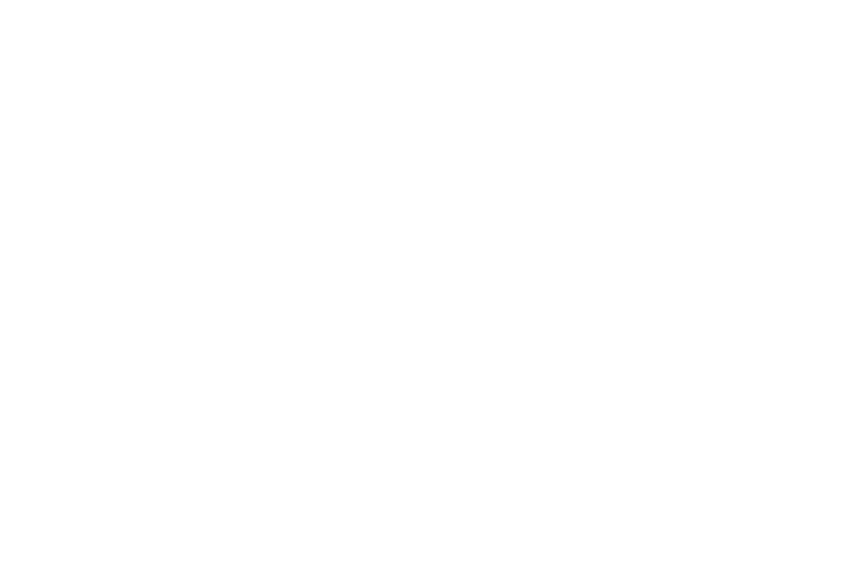
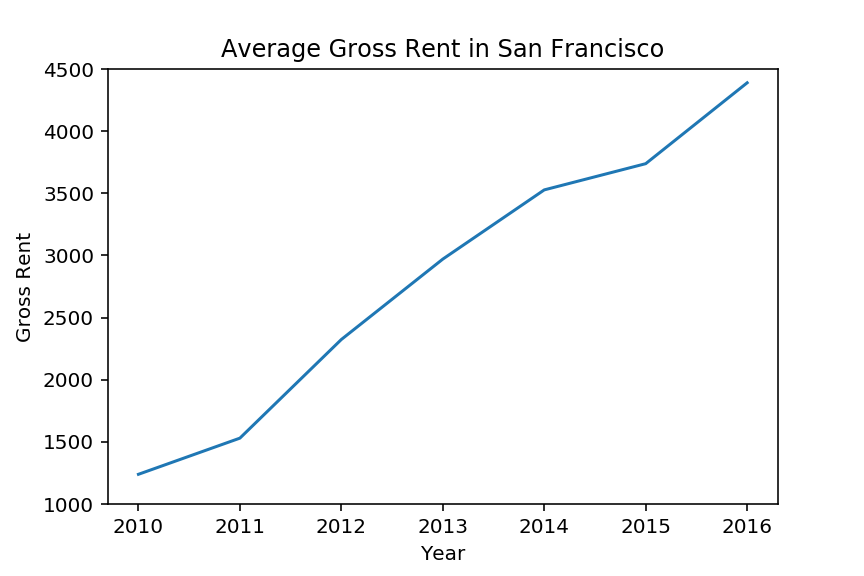
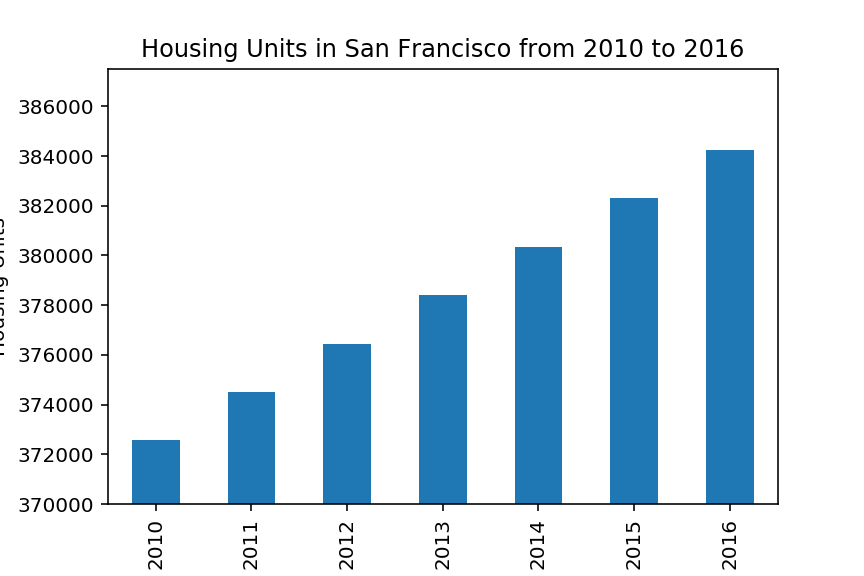
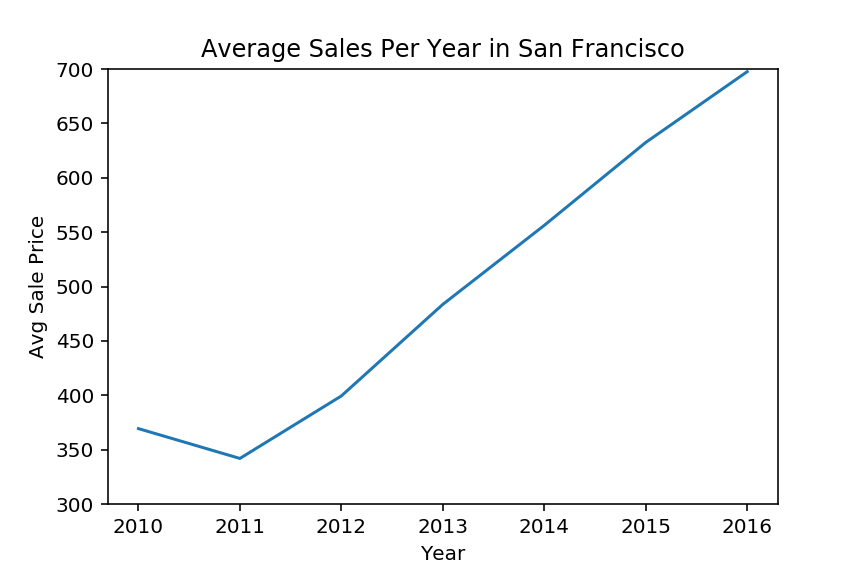

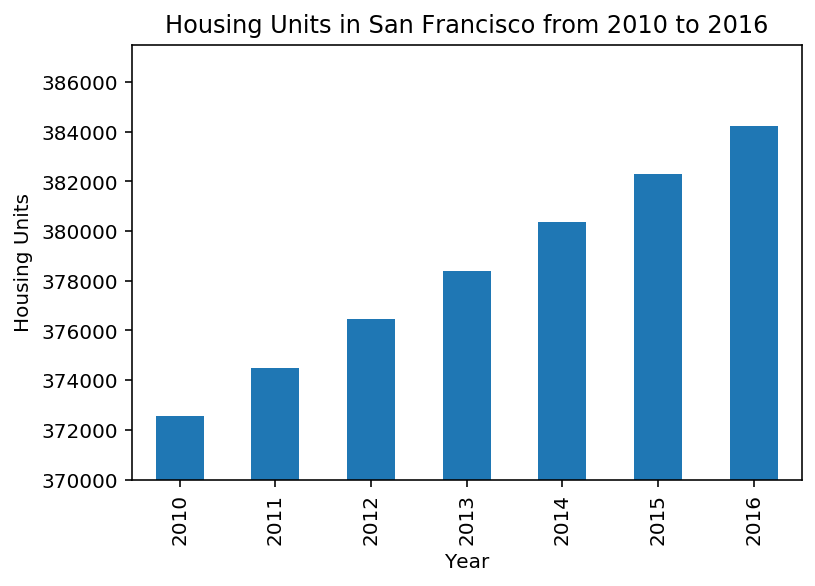

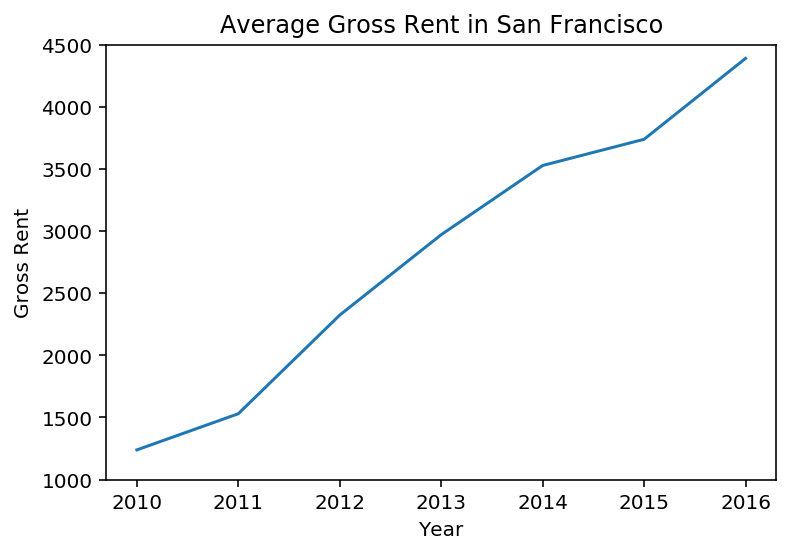

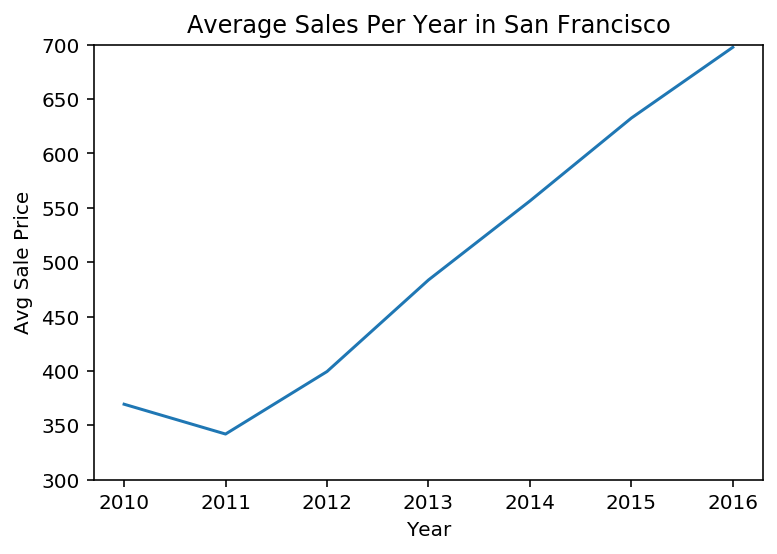

<Figure size 864x576 with 0 Axes>

In [5]:
# YOUR CODE HERE!

housing_unit = pn.Column(
    """ SF Housing Unit""", 
     housing_units_per_year())

housing_avg = pn.Column(
    "## SF Average Value",
    average_gross_rent(),
    average_sales_price(),
    average_price_by_neighborhood())
    

expensive_neighbourhood = pn.Column(
    "## Top 10 Most Expensive Neighborhoods",
    top_most_expensive_neighborhoods())

parellel_plot = pn.Column(parallel_coordinates(),
                          parallel_categories())

map_plot = pn.Column(
    "## San Fran Map",
    neighborhood_map())

panel = pn.Tabs(
                ("Housing Units", housing_unit),
                ("Housing Average",housing_avg),
                ("10 Exp Neighborhood", expensive_neighbourhood),
                ("Parellel Plot",parellel_plot),
                ("SF MAP", map_plot))
panel

## Serve the Panel Dashboard

Tabs
    [0] Column
        [0] Markdown(str)
        [1] Matplotlib(Figure)
    [1] Column
        [0] Markdown(str)
        [1] Matplotlib(Figure)
        [2] Matplotlib(Figure)
        [3] Matplotlib(Figure)
    [2] Column
        [0] Markdown(str)
        [1] HoloViews(Bars)
    [3] Column
        [0] Plotly(Figure)
        [1] Plotly(Figure)
    [4] Column
        [0] Markdown(str)
        [1] Plotly(Figure)
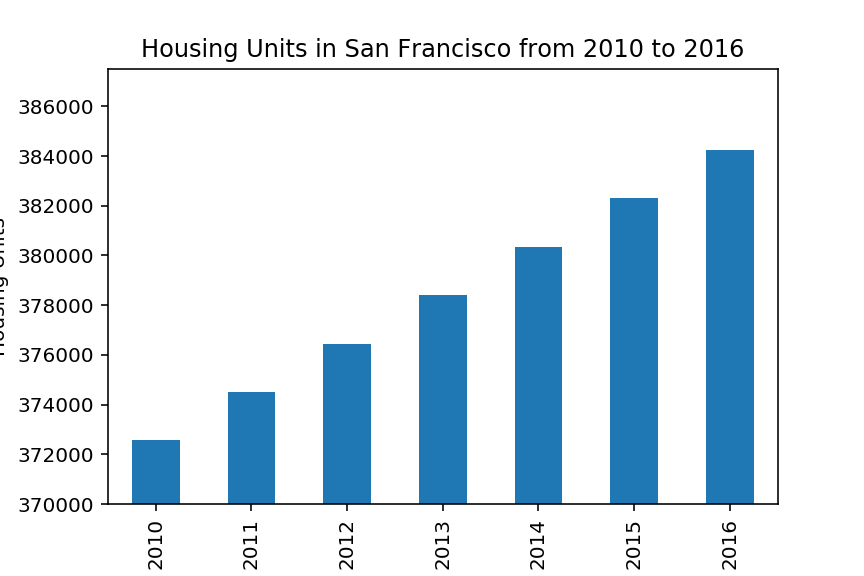
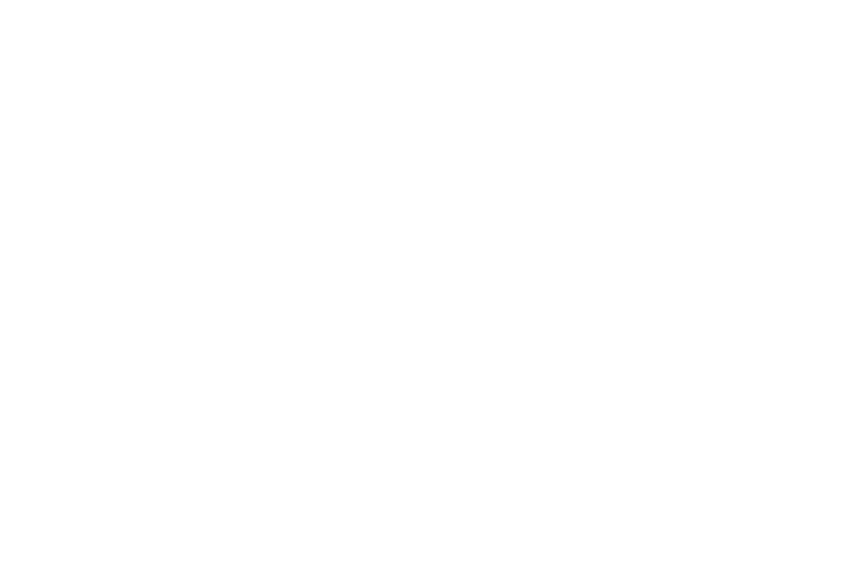
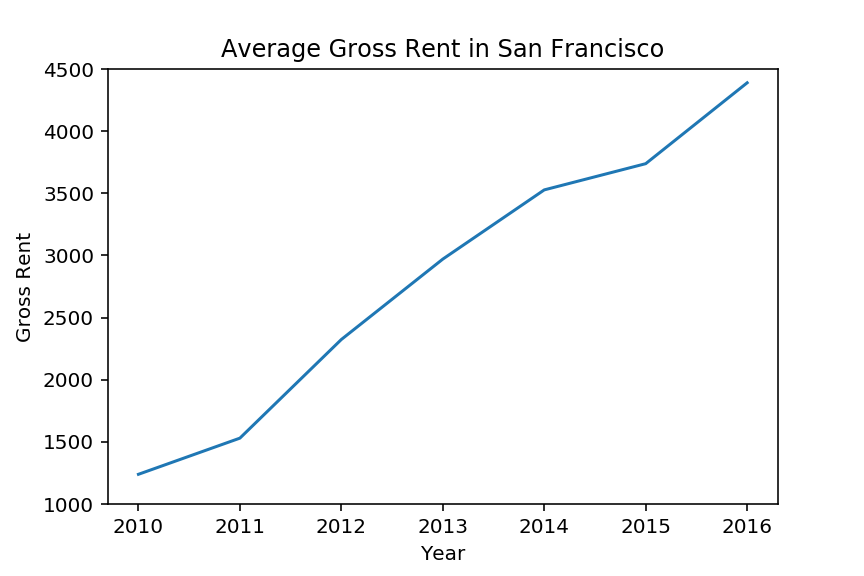
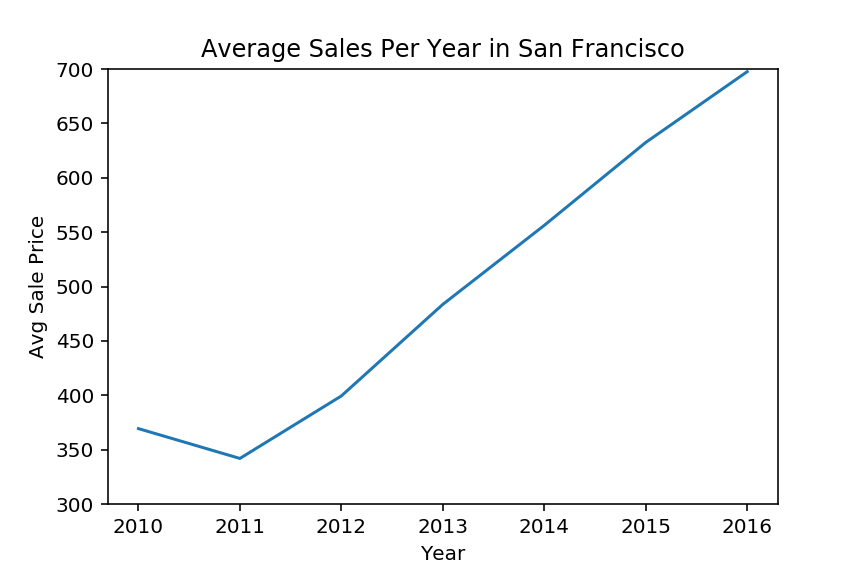

In [18]:
panel.servable()